In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
import numpy as np

In [3]:
import matplotlib
matplotlib.use('AGG')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white") 

# display plots in this notebook
%matplotlib inline

## use fully connected layer only

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [ ]:
X_dim = mnist.train.images.shape[1]
y_dim = mnist.train.labels.shape[1]
Z_dim = 100
h_dim = 128
batch_size = 128

In [5]:
X = tf.placeholder(tf.float32, shape=[None, X_dim], name='X')

In [6]:
with tf.variable_scope('D') as scope:
    D_W1 = tf.get_variable('W1', shape=[X_dim, h_dim], initializer=tf.contrib.layers.xavier_initializer())
    D_b1 = tf.get_variable('b1', shape=[h_dim], initializer=tf.zeros_initializer())
    D_W2 = tf.get_variable('W2', shape=[h_dim, 1], initializer=tf.contrib.layers.xavier_initializer())
    D_b2 = tf.get_variable('b2', shape=[1], initializer=tf.zeros_initializer())

In [7]:
var_D = [D_W1, D_b1, D_W2, D_b2]

In [8]:
Z = tf.placeholder(tf.float32, shape=[None, Z_dim], name='Z')

In [9]:
with tf.variable_scope('G') as scope:
    G_W1 = tf.get_variable('W1', shape=[Z_dim, h_dim], initializer=tf.contrib.layers.xavier_initializer())
    G_b1 = tf.get_variable('b1', shape=[h_dim], initializer=tf.zeros_initializer())
    G_W2 = tf.get_variable('W2', shape=[h_dim, X_dim], initializer=tf.contrib.layers.xavier_initializer())
    G_b2 = tf.get_variable('b2', shape=[X_dim], initializer=tf.zeros_initializer())

In [10]:
var_G = [G_W1, G_b1, G_W2, G_b2]

In [11]:
def sample_Z(m, n):
    return np.random.uniform(-1, 1, size=[m, n])

In [12]:
def generator(z):
    G_h1 = tf.nn.relu(tf.matmul(z, G_W1) + G_b1)
    G_logit = tf.matmul(G_h1, G_W2) + G_b2
    G_prob = tf.nn.sigmoid(G_logit)
    
    return G_prob

In [13]:
def discriminator(x):
    D_h1 = tf.nn.relu(tf.matmul(x, D_W1) + D_b1)
    D_logit = tf.matmul(D_h1, D_W2) + D_b2
    D_prob = tf.nn.sigmoid(D_logit)
    
    return D_prob, D_logit

In [14]:
G_sample = generator(Z)
D_prob_real, D_logit_real = discriminator(X)
D_prob_fake, D_logit_fake = discriminator(G_sample)

In [15]:
D_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_real, labels=tf.ones_like(D_logit_real)))
D_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_fake, labels=tf.zeros_like(D_logit_fake)))

D_loss = D_loss_real + D_loss_fake

In [16]:
G_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_fake, labels=tf.ones_like(D_logit_fake)))

In [17]:
D_solver = tf.train.AdamOptimizer().minimize(D_loss, var_list=var_D)

In [18]:
G_solver = tf.train.AdamOptimizer().minimize(G_loss, var_list=var_G)

In [36]:
saver = tf.train.Saver(max_to_keep=5)

samples_dict = {}
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(100000):
        if i % 1000 == 0:
            n_samples = 16
            samples = sess.run(G_sample, feed_dict={Z: sample_Z(n_samples, Z_dim)})
            samples_dict[i] = samples
        
        X_mb, _ = mnist.train.next_batch(batch_size)
        _, D_loss_curr = sess.run([D_solver, D_loss], feed_dict={X: X_mb, Z: sample_Z(batch_size, Z_dim)})
        _, G_loss_curr = sess.run([G_solver, G_loss], feed_dict={Z: sample_Z(batch_size, Z_dim)})
        
        if i % 1000 == 0:
            print "Iter: {}".format(i)
            print "D loss: {:.4}".format(D_loss_curr)
            print "G loss: {:.4}".format(G_loss_curr)
            
            saver.save(sess, 'save/GAN/GAN', global_step=i)

Iter: 0
D loss: 1.828
G loss: 1.244
Iter: 1000
D loss: 0.05881
G loss: 4.585
Iter: 2000
D loss: 0.09512
G loss: 4.38
Iter: 3000
D loss: 0.07322
G loss: 5.015
Iter: 4000
D loss: 0.144
G loss: 6.019
Iter: 5000
D loss: 0.2726
G loss: 5.88
Iter: 6000
D loss: 0.2928
G loss: 3.497
Iter: 7000
D loss: 0.4343
G loss: 3.417
Iter: 8000
D loss: 0.5618
G loss: 3.666
Iter: 9000
D loss: 0.4869
G loss: 3.179
Iter: 10000
D loss: 0.5147
G loss: 3.195
Iter: 11000
D loss: 0.5867
G loss: 2.74
Iter: 12000
D loss: 0.6305
G loss: 2.567
Iter: 13000
D loss: 0.7131
G loss: 2.733
Iter: 14000
D loss: 0.7291
G loss: 2.065
Iter: 15000
D loss: 0.5009
G loss: 2.289
Iter: 16000
D loss: 0.7098
G loss: 2.288
Iter: 17000
D loss: 0.6796
G loss: 2.185
Iter: 18000
D loss: 0.7165
G loss: 2.093
Iter: 19000
D loss: 0.7554
G loss: 2.03
Iter: 20000
D loss: 0.7911
G loss: 1.882
Iter: 21000
D loss: 0.7152
G loss: 1.616
Iter: 22000
D loss: 0.7818
G loss: 2.18
Iter: 23000
D loss: 0.7586
G loss: 2.374
Iter: 24000
D loss: 0.6662
G loss

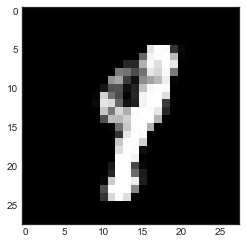

In [41]:
plt.imshow(samples_dict[99000][5,:].reshape((28,28)), cmap='gray')

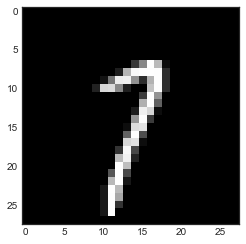

In [24]:
plt.imshow(X_mb[0,:].reshape((28,28)), cmap='gray')